# Pymaceuticals Inc.
---

### Analysis

- After reviewing the data of 249 mice (with an even split of male and female mice) comparing tumor sizes and the effectiveness of potential treatments, it was found that across all drug regimens the tumors averaged in size between 40-55mm. 
- Capomulin and Ramicane were observed over more timepoints (days) compared to the other drugs. Both also show lower tumor volumes, but a large range in size variety per the graphed whisker plot. 
- The data for mouse ID I509 (Capomulin participant) over a 45-day period showing a decrease in its tumor size by 5mm. While this decrease shows a positive effect when looking closely over the line graph data, we can see signs of size regression. 
- Overall, with the mice exposed to the Capomulin regimen it appears that weight and tumor size are correlated (correlation=0.84) meaning that the larger a mouse is the more likely it will have a larger tumor.




In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(mouse_metadata, study_results,
                     on='Mouse ID',
                     how='inner')

# Display the data table for preview
study_data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
study_data['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data[study_data.duplicated(keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = study_data[study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data[study_data['Mouse ID'] != "g989"]

clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_study_data['Mouse ID'].nunique()

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_data = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

summary_data['SEM'] = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_data


,count,mean,std,min,25%,50%,75%,max,SEM
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_data = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_data.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

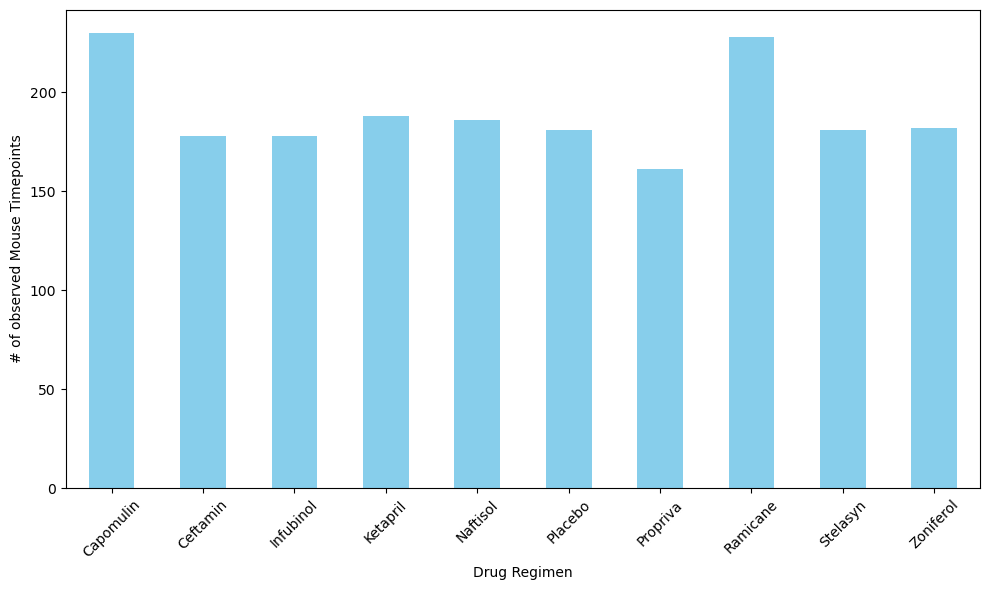

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count = study_data.groupby('Drug Regimen')['Mouse ID'].count()

# Create a bar plot
regimen_count.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

# Show the plot
plt.tight_layout()
plt.show()



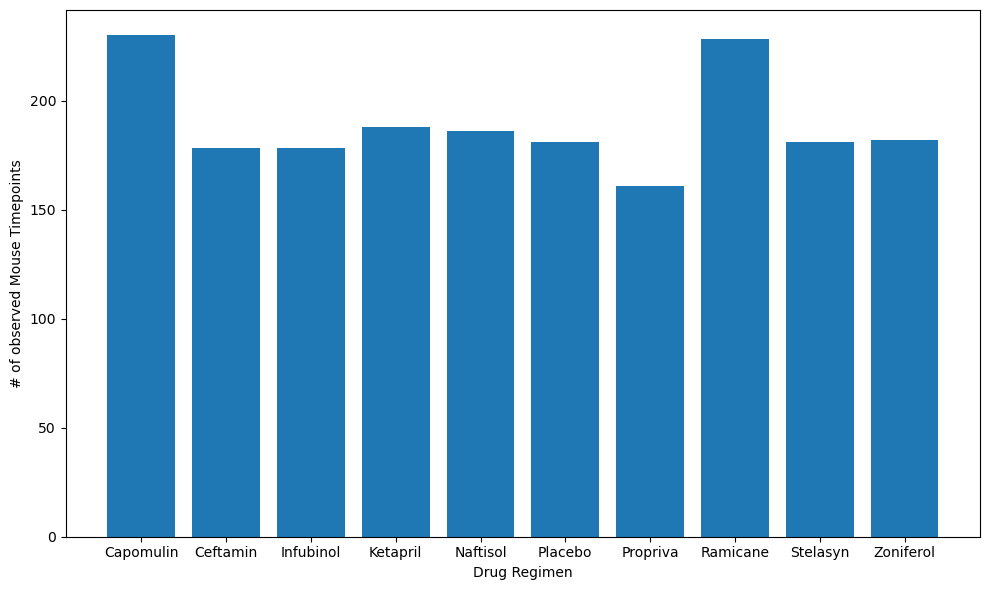

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar plot using Matplotlib's Pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_count.index, regimen_count)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


# Show the plot
plt.tight_layout()
plt.show()

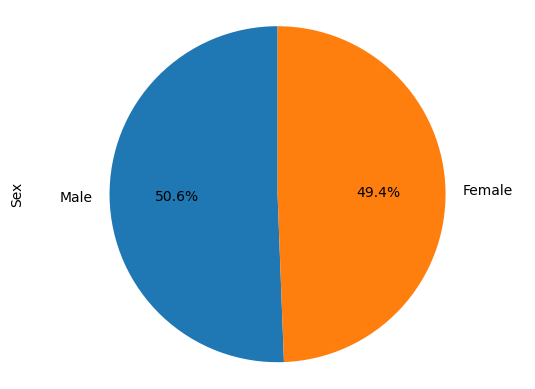

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = study_data['Sex'].value_counts()

# Create a pie chart using Pandas
gender.plot(kind='pie', autopct='%1.1f%%', startangle=90)


# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

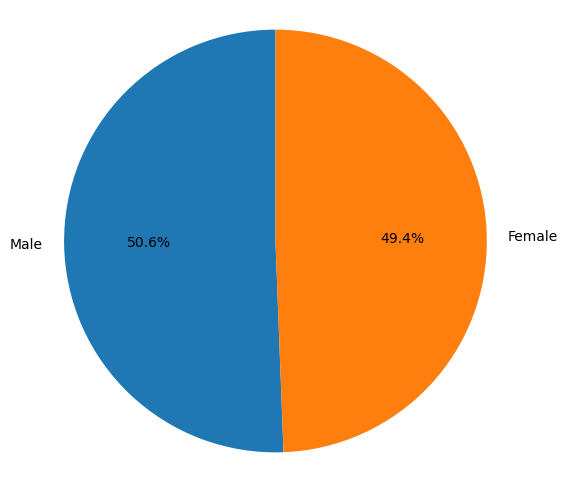

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a pie chart using Matplotlib's Pyplot
plt.figure(figsize=(6, 6))
labels = gender.index
sizes = gender.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, study_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on the current drug regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    
    # Get the tumor volumes for this regimen
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR (Interquartile Range) for this regimen
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for identifying potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]    
    

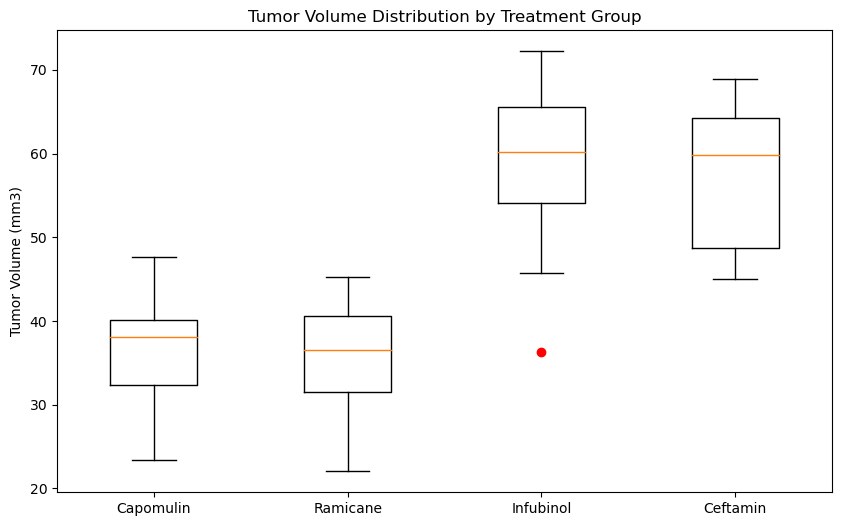

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens, sym='ro')
plt.title('Tumor Volume Distribution by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

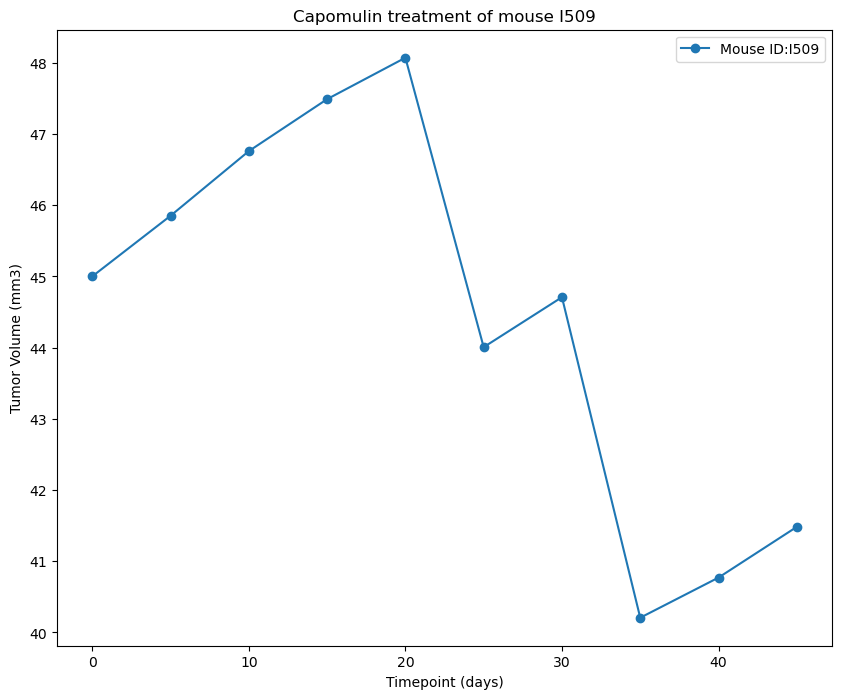

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter the data to include only mice treated with Capomulin
capomulin_data = study_data[study_data['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse by 'Mouse ID'
mouse_id = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']


# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 8))
plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'], marker='o', label=f'Mouse ID:I509')
plt.title(f'Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.show()

C:\Users\diann\AppData\Local\Temp\ipykernel_87628\1645970531.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_tumor_volume = capomulin_data.groupby('Mouse ID')["Weight (g)", 'Tumor Volume (mm3)'].mean().reset_index()


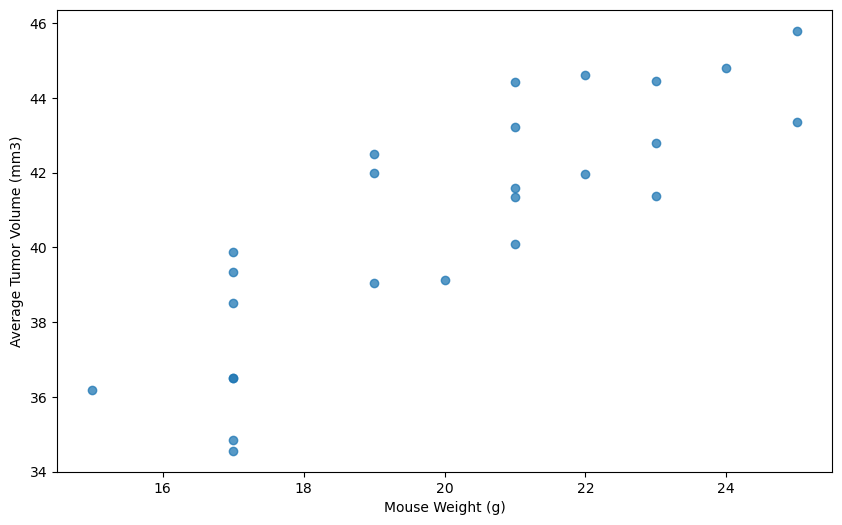

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the data by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')["Weight (g)", 'Tumor Volume (mm3)'].mean().reset_index()


# Create a scatter plot of mouse weight vs. the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], alpha=0.75)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


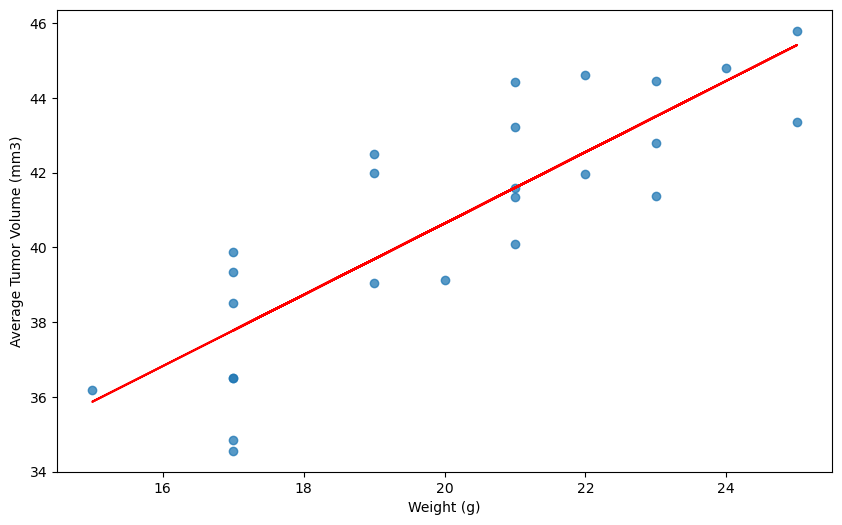

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = round(st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])[0],2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], alpha=0.75)

# Calculate the linear regression model
(slope, intercept, r_value, p_value, std_err) = linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
regress_values = average_tumor_volume['Weight (g)'] * slope + intercept

# Add the regression line to the scatter plot
plt.plot(average_tumor_volume['Weight (g)'], regress_values, 'r-')

# Set the title and labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Show the plot
plt.show()
